# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette('pastel')
import statistics as st

In [165]:
df = pd.read_csv('fitness_class_2212.csv')
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [166]:
df.shape

(1500, 8)

## Task 1 
For every column in the data:
a. State whether the values match the description given in the table above.
b. State the number of missing values in the column.
c. Describe what you did to make values match the description if they did not
match.

In [167]:
def data_validation(colname = None):
    print("Column data type is: ", df[colname].dtype)
    print("Number of missing values: ", df[colname].isnull().sum())
    print("Number of unique values: ", df[colname].nunique())    

## Column: `booking_id`

In [168]:
data_validation('booking_id')

Column data type is:  int64
Number of missing values:  0
Number of unique values:  1500


In [169]:
df['booking_id'] = df['booking_id'].astype('object')
data_validation('booking_id')

Column data type is:  object
Number of missing values:  0
Number of unique values:  1500


For the `booking_id` column:
- The values do not match the description.
- The values were integers and were converted to object format to fit the nominal data type.
- The values are unique matching the number of rows.
- There are no missing values.


## Column: `months_as_member`

In [170]:
data_validation('months_as_member')

Column data type is:  int64
Number of missing values:  0
Number of unique values:  72


In [171]:
# check minimum value
df['months_as_member'].min()

1

For the `months_as_member` column:
- The values match the description.
- The values were integers with a minimum value of 1.
- There are no missing values.

## Column: `weight`

In [172]:
data_validation('weight')

Column data type is:  float64
Number of missing values:  20
Number of unique values:  1241


In [173]:
df['weight'].unique()

array([79.56, 79.01, 74.53, ..., 87.38, 68.64, 94.39])

In [174]:
df['weight'].min()

55.41

In [175]:
# replace missing values
df['weight'] = df['weight'].fillna(df['weight'].mean().round(2))

In [176]:
data_validation('weight')

Column data type is:  float64
Number of missing values:  0
Number of unique values:  1241


For the `weight` column:
- The values match the description.
- The values were floats(continuous) and are rounded to 2 decimal places.
- There are 20 missing values which were replaced by the overall mean value for the column.


## Column: `days_before`

In [177]:
data_validation('days_before')

Column data type is:  object
Number of missing values:  0
Number of unique values:  31


In [178]:
# check minimum value
df['days_before'].min()

'1'

In [179]:
df['days_before'].unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

In [180]:
# extract numerical values from strings
df['days_before'] = df['days_before'].str.split(' ', expand=True)[0]
# change column data type
df['days_before'] = df['days_before'].astype('int')

In [181]:
data_validation('days_before')

Column data type is:  int64
Number of missing values:  0
Number of unique values:  19


For the `days_before` column:
- The values do not match the description.
- The values were strings(objects) and were cleaned to extract the numbers and converted the values to integers (discrete).
- The minimum value is 1.
- There are no missing values.


## Column: `day_of_week`

In [182]:
data_validation('day_of_week')

Column data type is:  object
Number of missing values:  0
Number of unique values:  10


In [183]:
df['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [184]:
# replace the incorrect values
df['day_of_week'] = df['day_of_week'].replace({'Wednesday': "Wed", 
                                               "Fri.": "Fri", 
                                               "Monday": "Mon"})
# replace value to create ordinal values
mapper = {'Wed': 4, 'Mon': 2, 'Sun': 1, 'Fri': 6, 'Thu': 5, 'Tue': 3, 'Sat': 7}
df['day_of_week'] = df['day_of_week'].replace(mapper)

In [185]:
data_validation('day_of_week')

Column data type is:  int64
Number of missing values:  0
Number of unique values:  7


For the `day_of_week` column:
- The values do not match the description.
- The column contained wrongly inputed values and were corrected.
- The values were also converted to ordinal values.
- There are no missing values.


## Column: `time`

In [186]:
data_validation('time')

Column data type is:  object
Number of missing values:  0
Number of unique values:  2


In [187]:
# make values ordinal
df['time'] = df['time'].replace({"AM": 1, "PM": 2})

In [188]:
data_validation('time')

Column data type is:  int64
Number of missing values:  0
Number of unique values:  2


For the `time` column:
- The values do not match the description.
- The values were also converted to ordinal values.
- There are no missing values.

## Column: `category`

In [189]:
data_validation('category')

Column data type is:  object
Number of missing values:  0
Number of unique values:  6


In [190]:
df['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

In [191]:
df['category'] = df['category'].replace({"-": "unknown"})
df['category'] = df['category'].astype('category')

For the `category` column:
- The values do not match the description.
- The missing value ("-") was replaced with unknown.
- The values were also converted to categorical values.


## Column: `attended`

In [192]:
data_validation('attended')

Column data type is:  int64
Number of missing values:  0
Number of unique values:  2


In [193]:
df['attended'] = df['attended'].astype('category')

For the `attended` column:
- The values do not match the description.
- The are no missing values. 
- The values were also converted to categorical values.

## Task 2
* The non-attendance category had more observations, indicating that more people did not attend their bookings.

* The attendance categories are not balanced with the group that did not attend being almost 2x those that attended.


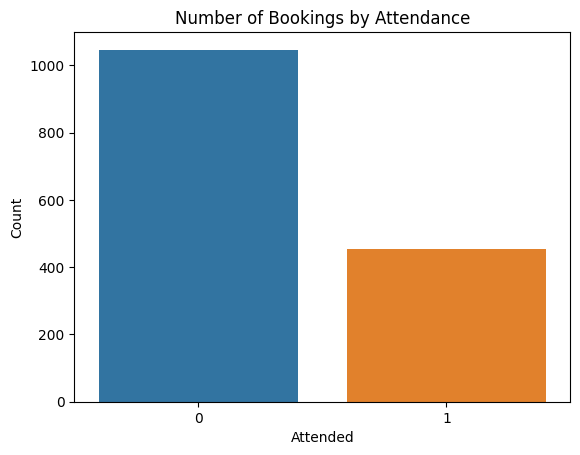

In [194]:
sns.countplot(x = df['attended']);
plt.xlabel('Attended');
plt.ylabel('Count');
plt.title('Number of Bookings by Attendance');

In [195]:
df.columns

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')

## Task 3
* The distribution of the number of `months_as_member` is right skewed and has a median value of 12 months.

In [196]:
print("Median number of months as a member: ", df['months_as_member'].median())

Median number of months as a member:  12.0


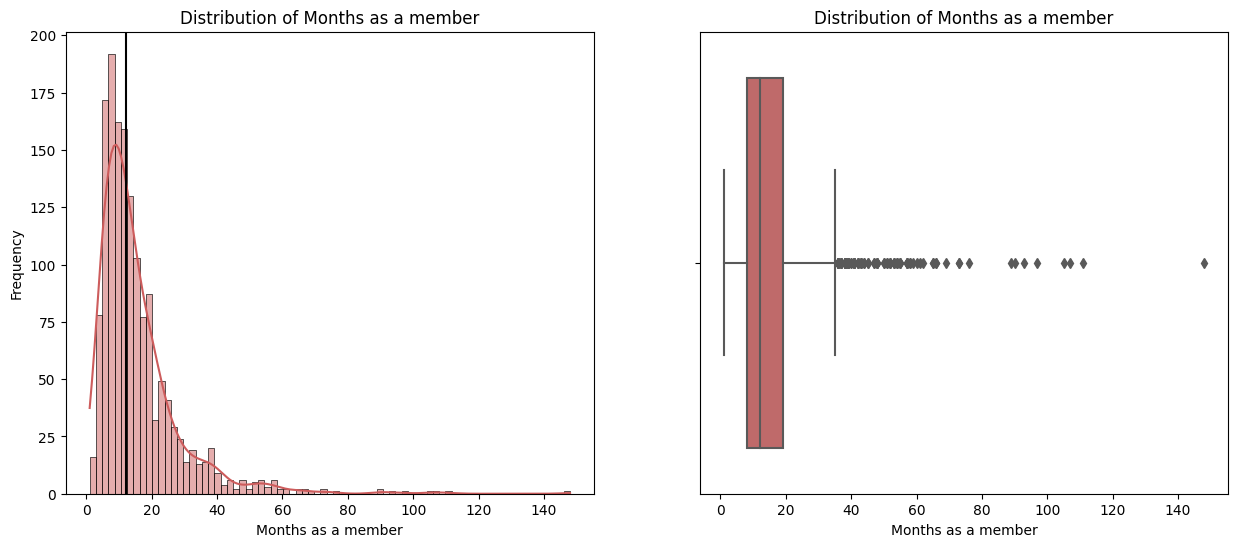

In [197]:
f, axes = plt.subplots(1, 2, figsize = (15, 6))
sns.histplot(x = 'months_as_member', data = df, 
             ax = axes[0], kde = True,
            color = 'indianred');
axes[0].set_title('Distribution of Months as a member');
axes[0].set_ylabel('Frequency');
axes[0].set_xlabel('Months as a member');
axes[0].axvline(x=df['months_as_member'].median(), ymin=0, ymax=220, color = 'black')
sns.boxplot(x = 'months_as_member', data = df, 
            ax = axes[1], color = 'indianred');
axes[1].set_title('Distribution of Months as a member');
axes[1].set_xlabel('Months as a member');

## Task 4
* Members that had been members for longer attended their bookings more than those who have been members for lesser months. 


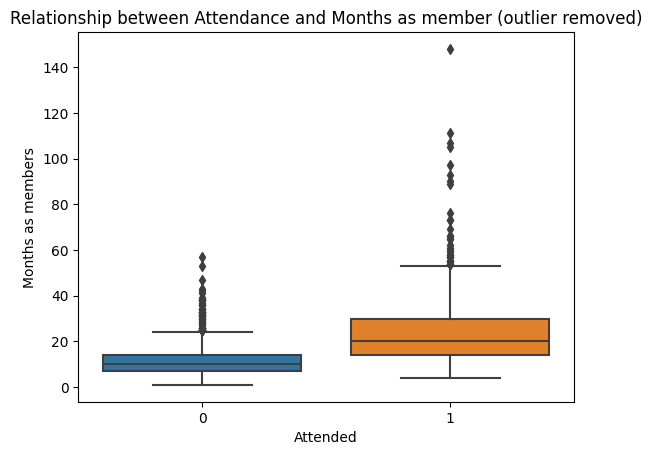

In [198]:
sns.boxplot(x = 'attended',
           y = 'months_as_member',
           data = df);
plt.xlabel('Attended');
plt.ylabel('Months as members');
plt.title("Relationship between Attendance and Months as member (outlier removed)");

In [199]:
outlier = df.months_as_member == df.months_as_member.max()
df_rem_outlier = df[~outlier]

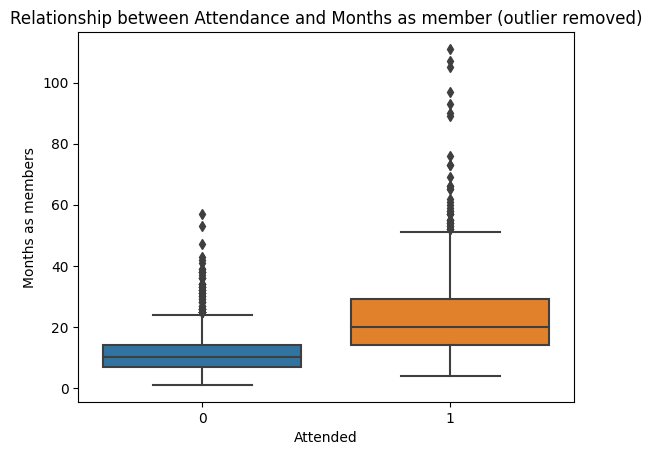

In [200]:
sns.boxplot(x = 'attended',
           y = 'months_as_member',
           data = df_rem_outlier);
plt.xlabel('Attended');
plt.ylabel('Months as members');
plt.title("Relationship between Attendance and Months as member (outlier removed)");

## Task 5
The problem to predict whether members will attend their bookings or not is a classification machine learning problem, having the classes: 0 (not attended) or 1 (attended).

### Data Manipulation

In [201]:
df = df[~outlier]

In [202]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [203]:
variables = df.drop('attended', axis =1)
X = pd.get_dummies(variables, columns = ['day_of_week', 'time', 'category'])
y = df['attended']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Task 6
Baseline model - Logistic Regression

In [205]:
lr = LogisticRegression() 
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

## Task 7
Comparison Model - Random Forest

In [206]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

## Task 8
* The **Logistic Regression** algorithm is a simple algorithm that is generally easy to interprete and computationally efficient. The **Random Forest Classification** algorithm combines multiple tree methods, thereby reducing overfitting. It also captures more complex feature patterns providing better accuracy.

## Task 9
Model Comparison


In [207]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, lr_y_pred)) 

print("Random Forest Classification Report")
print(classification_report(y_test, rf_y_pred))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       318
           1       0.68      0.44      0.53       132

    accuracy                           0.78       450
   macro avg       0.74      0.68      0.69       450
weighted avg       0.76      0.78      0.76       450

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       318
           1       0.67      0.52      0.58       132

    accuracy                           0.78       450
   macro avg       0.74      0.71      0.72       450
weighted avg       0.77      0.78      0.78       450



## Task 10
* The **Logistic Regression** and **Random Forest** models performs similarly, with about 1% differences in their accuracies. The F1-score for both classes and algorithms were also similar.
* This indicates that for this classification problem, there is no need for a more complex algorithm like the **Random Forest**. A simpler and more efficient **Logistic Regression** algorithm is just as effective.


## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam